# Part I - (Données PISA)
## by (James Bimbai)

## Investigation Overview


>Dans ce projet qui consistait à mener une enquête sur les comportements des élèves envers les mathématiques et aussi l'attitude des parents sur le perception de l'importance des mathématiques.

## Dataset Overview

>Nous avons travaillé sur quelques fonctionnalités ( self, gender, objective, apprehension, score, parents_view, importance, work_method) de notre ensemble de données après le processus de nettoyage.

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the dataset into a pandas dataframe

pisa=pd.read_csv('pisa2012_.csv')
pisa.head()

,country,gender,objective,importance,work_method,attitude,parents_view,self,score,apprehension
0,Albania,Female,406.8469,3.50,2.6,3.00,3.000000,3.000000,1.75,2.8
1,Albania,Female,486.1427,2.75,NaN,2.25,3.222222,2.666667,2.50,NaN
2,Albania,Female,533.2684,4.00,NaN,3.25,3.888889,3.666667,2.00,NaN
3,Albania,Female,412.2215,NaN,NaN,NaN,NaN,NaN,NaN,2.6
4,Albania,Female,381.9209,4.00,3.2,2.50,3.777778,3.666667,NaN,2.4


## OBJECTIVE

Après examination du score de motivation et d'objective, nous constactons que le score est presque distribué avec un pic de 700.


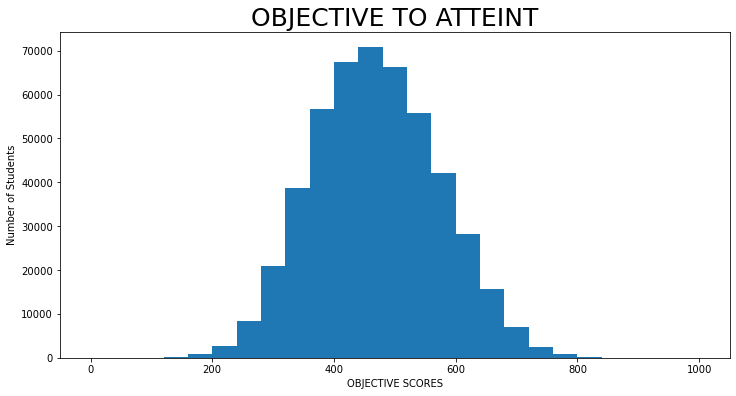

In [28]:

# Définir la taille de la figure
plt.figure(figsize=[12,6])


bins = np.arange(0, pisa['objective'].max()+40, 40)

plt.hist(data=pisa, x='objective', bins=bins);
plt.title('OBJECTIVE TO ATTEINT', size=25)
plt.xlabel('OBJECTIVE SCORES')
plt.ylabel('Number of Students');

plt.savefig('hist_score.png')

## GENDER

Le graphe nous montre que les sexes sont égaux

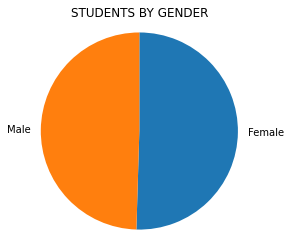

In [18]:
gender_counts = pisa['gender'].value_counts()

plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False);

# Nous avons utilisé l'option « Square ».
plt.axis('square')

plt.title('STUDENTS BY GENDER');

In [38]:
percent_male = pisa['gender'].value_counts()['Male']/pisa.shape[0]
percent_female = pisa['gender'].value_counts()['Female']/pisa.shape[0]
print('Male: {:.2f}%'.format(percent_male))
print('Female: {:.2f}%'.format(percent_male))

Male: 0.50%
Female: 0.50%


## COUNTRY

La marge entre d'élèves qui participent à l'enquête est entre 5 000 et 7 000. La boîte à moustaches montre également qu'il existe quelques valeurs aberrantes.

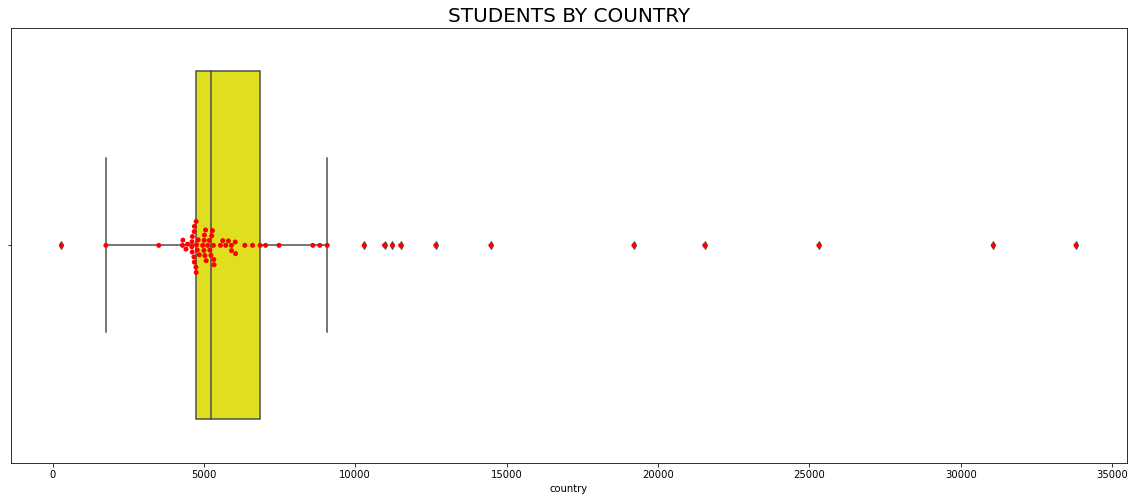

In [19]:
# Définir une taille de figure
plt.figure(figsize=(20,8))

# Affichage du diagramme
order = pisa['country'].value_counts()

sb.boxplot(order, color='yellow')
sb.swarmplot(order, color='red')
plt.title('STUDENTS BY COUNTRY', size=20);

## PARENTS_VIEW

Nous avons une faible inclinaison vers la gauche, nous avons la preuve que la plupart des élèves ont une opinion positive de l'attitude de leurs parents envers les mathématiques

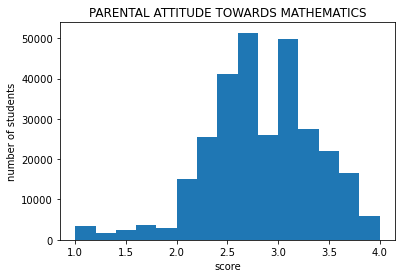

In [4]:
# Affichage du diagramme
bins=np.arange(pisa['parents_view'].min(),pisa['parents_view'].max() +1/5, 1/5)

plt.hist(data=pisa, x='parents_view', bins=bins)
plt.xlabel('score')
plt.ylabel('number of students')
plt.title('PARENTAL ATTITUDE TOWARDS MATHEMATICS');



##  GENDER BY STUDENT'S PERCEPTION OF PARENTAL ATTITUDE TOWARDS MATHEMATICS

Après examinations nous ne trouvons pas une grande difference entre les étudiants masculins et les étudiants féminins 
sur la perception des parents sur les mathématiques dans les pourcentages suivants: 25%, 50%, 75%.

Text(0.5, 1.0, 'PARENTAL VIEW BY GENDER')

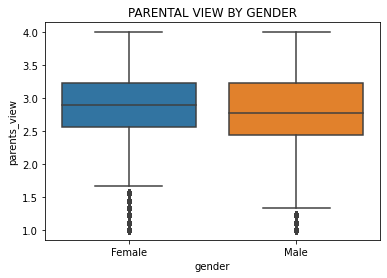

In [27]:
# Affichage du diagramme

sb.boxplot(data=pisa, y='parents_view', x='gender');
plt.title('PARENTAL VIEW BY GENDER')

## ATTITUDE BY PARENTAL VIEW

La correction est positive et modérée de la façon dont les élèves perçoivent l'attitude des parents envers les mathématiques et la motivation de l'élève pour les mathématiques.

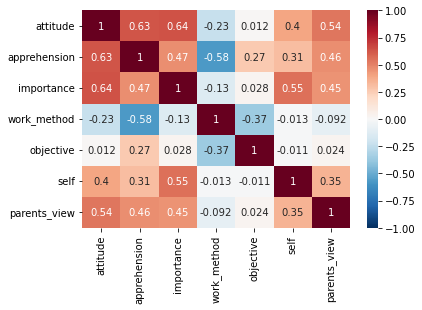

In [6]:
# Affichage du diagramme
behavior=['attitude', 'apprehension','importance', 'work_method', 'objective', 'self']

sb.heatmap(data=pisa[behavior+['parents_view']].corr(), center=0, cmap="RdBu_r",annot=True, vmin=-1, vmax=1);


In [34]:
pisa.query('gender=="Female"').parents_view.describe(), pisa.query('gender=="Male"').parents_view.describe()

(count    156145.000000
 mean          2.900185
 std           0.555986
 min           1.000000
 25%           2.555556
 50%           2.888889
 75%           3.222222
 max           4.000000
 Name: parents_view, dtype: float64,
 count    150586.000000
 mean          2.831092
 std           0.596426
 min           1.000000
 25%           2.444444
 50%           2.777778
 75%           3.222222
 max           4.000000
 Name: parents_view, dtype: float64)

## PARENTS_VIEW

Nous avons une faible inclinaison vers la gauche, nous avons la preuve que la plupart des élèves ont une opinion positive de l'attitude de leurs parents envers les mathématiques.

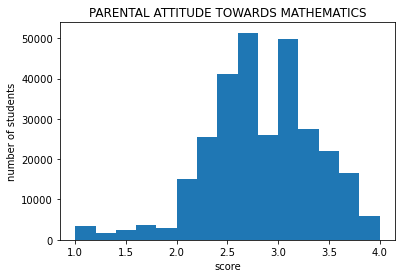

In [24]:
# Affichage du diagramme
bins=np.arange(pisa['parents_view'].min(),pisa['parents_view'].max() +1/5, 1/5)

plt.hist(data=pisa, x='parents_view', bins=bins)
plt.xlabel('score')
plt.ylabel('number of students')
plt.title('PARENTAL ATTITUDE TOWARDS MATHEMATICS');

## PARENTAL_VIEW SCORE BY GENDER

Nous constatons que peu d'élèves de sexe masculin pensent que les mathématiques sont bien.

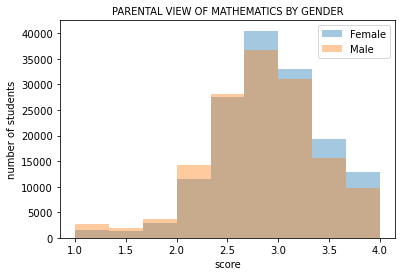

In [33]:
# Affichage du diagramme
plt.hist(pisa.query('gender=="Female"')['parents_view'],bins=np.arange(1,4+1/3,1/3), label='Female', alpha=.4)
plt.hist(pisa.query('gender=="Male"')['parents_view'],bins=np.arange(1,4+1/3,1/3), label='Male', alpha=.4)
plt.legend()
plt.title('PARENTAL VIEW OF MATHEMATICS BY GENDER',size=10)
plt.xlabel('score')
plt.ylabel('number of students');

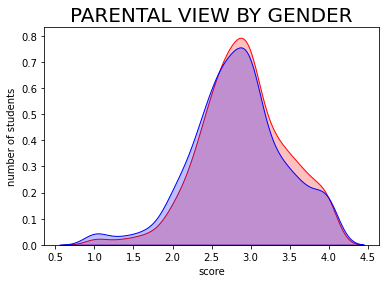

In [30]:
sb.kdeplot(data=pisa.query('gender=="Female"')['parents_view'], shade=True, color='red', bw=1/4, label='Female')
sb.kdeplot(data=pisa.query('gender=="Male"')['parents_view'], shade=True, color='blue', bw=1/4, label='Male')
plt.title('PARENTAL VIEW BY GENDER',size=20)
plt.xlabel('score')
plt.ylabel('number of students');

## COUNTRY

**Qusetion 3 :**

* Quel est la representation du nombres d'élèves par pays?.

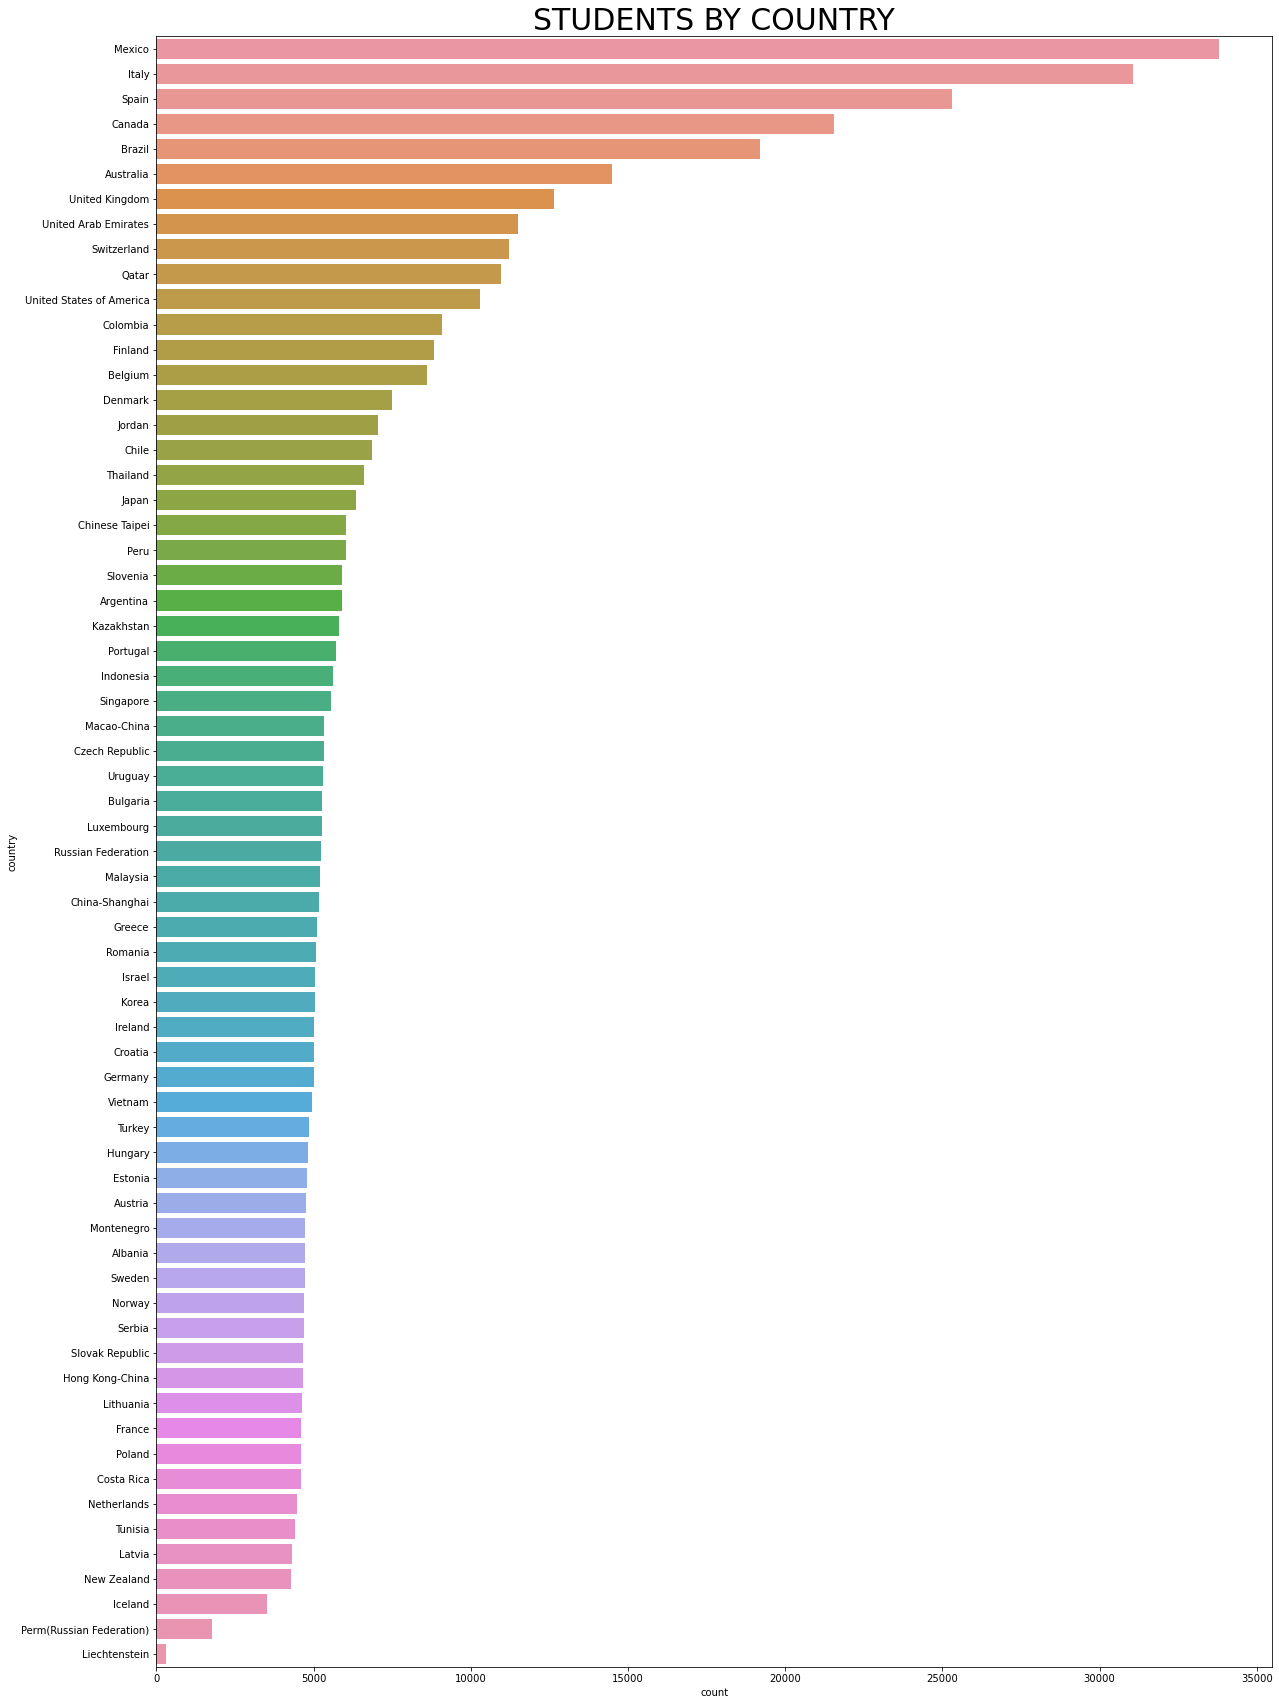

In [26]:
# Définir une taille de figure
plt.figure(figsize=[20,30])

# Tracer le pays sur un diagramme à barres horizontal
type_order= pisa['country'].value_counts().index
sb.countplot(data=pisa,y='country', order=type_order)
plt.title('STUDENTS BY COUNTRY',size=30);